# Винные образы

In [77]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.subplots as spp

``После просмотра документального фильма о сомелье вы захотели создать прогностическую модель для оценки вин вслепую, как это делает сомелье.``

**Определив бизнес-задачу**, вы перешли к сбору данных для обучения модели. После нескольких недель парсинга сайта WineEnthusiast вам удалось собрать около 130 тысяч строк обзоров вин для анализа и обучения.

Вот какие признаки вам удалось собрать:

**``сountry``**— страна-производитель вина.

**``description``** — подробное описание.

**``designation``** — название виноградника, где выращивают виноград для вина.

**``points``** — баллы, которыми WineEnthusiast оценил вино по шкале от 1 до 100.

**``price``** — стоимость бутылки вина.

**``province``** — провинция или штат.

**``region_1``** — винодельческий район в провинции или штате (например Напа).

**``region_2``** — конкретный регион. Иногда в пределах винодельческой зоны указываются более конкретные регионы (например Резерфорд в долине Напа), но это значение может быть пустым.

**``taster_name``** — имя сомелье.

**``taster_twitter_handle``** — твиттер сомелье.

**``title``** — название вина, которое часто содержит год и другую подробную информацию.

**``variety``** — сорт винограда, из которого изготовлено вино (например Пино Нуар).

**``winery``** — винодельня, которая производила вино.

Прочитаем наш файл с винными обзорами:

In [78]:
wine_data = pd.read_csv('data/wine.csv')
wine_data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Итак, файл прочитан. Далее мы займёмся анализом структуры собранных данных. А сейчас предлагаем вам ответить на несколько вопросов по содержимому набора данных.

### Задание 4.1
Сколько всего дегустаторов приняло участие в винных обзорах?

In [79]:
# Используем функцию df['taster_name'].nunique(), подсчитывая количество уникальных дегустаторов в наборе данных.
print(wine_data['taster_name'].nunique() ,'дегастаторов приняло участие в винных отборах')

19 дегастаторов приняло участие в винных отборах


### Задание 4.2
Какова максимальная цена за бутылку в этом наборе данных? Введите целое число.

In [80]:
# Используем функцию для подсчёта максимальной цены бутылки df['price'].max(). Она составила 3300.0, в целых числах — 3300.
print('Максимальная цена за бутылку составила:', wine_data['price'].max())

Максимальная цена за бутылку составила: 3300.0


### Задание 5.2

Проанализируйте представленный датасет и перечислите все числовые признаки через запятую.

In [81]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


### Задание 5.3

Проанализируйте датасет на наличие дублирующихся винных обзоров. Если дублирующиеся записи есть, удалите их.

In [82]:
mask_duplicate = wine_data.duplicated()
print('Дубликатов в датасете',wine_data[mask_duplicate].shape[0])
wine_data.drop_duplicates(inplace=True)

Дубликатов в датасете 9983


#### Отчистка данных

In [83]:
# Delete features with more than 30% gaps
thresh_wine = 0.7 * wine_data.shape[0]
wine_data.dropna(axis=1, thresh=thresh_wine, inplace=True)

# Fill na's
for col in wine_data.columns:
    col_type = str(wine_data[col].dtype)
    
    if 'float' in col_type or 'int' in col_type:
        wine_data[col].fillna(-1, inplace=True)
    elif col_type == 'object':
        wine_data[col].fillna('unknown', inplace=True)
        
wine_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 119988 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119988 non-null  object 
 1   description            119988 non-null  object 
 2   designation            119988 non-null  object 
 3   points                 119988 non-null  int64  
 4   price                  119988 non-null  float64
 5   province               119988 non-null  object 
 6   region_1               119988 non-null  object 
 7   taster_name            119988 non-null  object 
 8   taster_twitter_handle  119988 non-null  object 
 9   title                  119988 non-null  object 
 10  variety                119988 non-null  object 
 11  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


array([[<Axes: title={'center': 'points'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

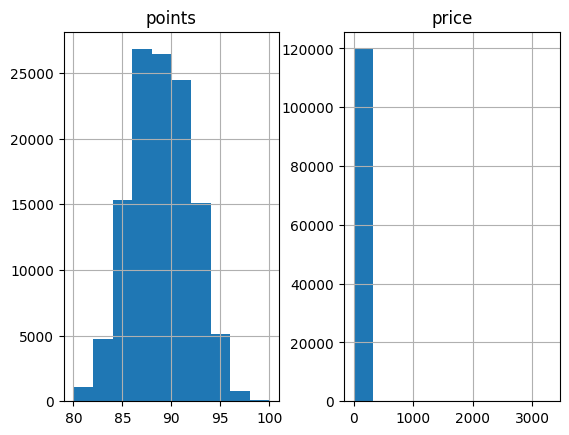

In [86]:
wine_data.hist()

In [88]:
wine_data.describe(include='all')

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
count,119988,119988,119988,119988.000000,119988.000000,119988,119988,119988,119988,119988,119988,119988
unique,44,119955,37980,NaN,NaN,426,1230,20,16,118840,708,16757
top,US,This opens with subtle aromas of wild flower a...,unknown,NaN,NaN,California,unknown,unknown,unknown,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,50457,2,34545,NaN,NaN,33656,19560,24917,29446,9,12278,211
mean,NaN,NaN,NaN,88.442236,33.058564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.092915,41.664837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,91.000000,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
